In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split , RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

In [2]:
data = pd.read_csv("Phishing_Legitimate_full.csv")

In [3]:
data

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,3,1,1,50,0,0,0,0,0,...,0,0,0,1,1,-1,1,0,1,0
9996,9997,2,1,4,59,1,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0
9997,9998,2,1,4,57,0,0,0,0,0,...,0,0,0,1,0,1,1,0,1,0
9998,9999,3,1,1,49,0,0,0,0,0,...,1,0,0,1,1,0,1,0,1,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  10000 non-null  int64  
 1   NumDots                             10000 non-null  int64  
 2   SubdomainLevel                      10000 non-null  int64  
 3   PathLevel                           10000 non-null  int64  
 4   UrlLength                           10000 non-null  int64  
 5   NumDash                             10000 non-null  int64  
 6   NumDashInHostname                   10000 non-null  int64  
 7   AtSymbol                            10000 non-null  int64  
 8   TildeSymbol                         10000 non-null  int64  
 9   NumUnderscore                       10000 non-null  int64  
 10  NumPercent                          10000 non-null  int64  
 11  NumQueryComponents                  10000 

<Axes: xlabel='CLASS_LABEL'>

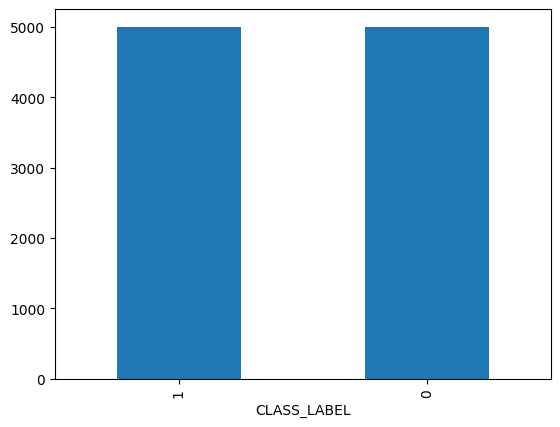

In [5]:
data['CLASS_LABEL'].value_counts().plot(kind="bar")

In [6]:
#co-relation with respect to class label
data.corr()['CLASS_LABEL']

,CLASS_LABEL
id,-0.866025
NumDots,0.294111
SubdomainLevel,0.043132
PathLevel,0.229450
UrlLength,-0.074493
NumDash,-0.372235
NumDashInHostname,0.150444
AtSymbol,-0.017323
TildeSymbol,0.095864
NumUnderscore,-0.098869


In [7]:
#feature enginerring , we will be removing the features which do not have much impact on the data
data[data['HttpsInHostname']==0]

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,3,1,1,50,0,0,0,0,0,...,0,0,0,1,1,-1,1,0,1,0
9996,9997,2,1,4,59,1,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0
9997,9998,2,1,4,57,0,0,0,0,0,...,0,0,0,1,0,1,1,0,1,0
9998,9999,3,1,1,49,0,0,0,0,0,...,1,0,0,1,1,0,1,0,1,0


#Our data doesnt have any this column =1 so we are going to drop it


In [8]:
X= data.drop(columns=["id","HttpsInHostname","SubdomainLevel","AtSymbol","NumNumericChars","DoubleSlashInPath","CLASS_LABEL"])
y= data["CLASS_LABEL"]
X

,NumDots,PathLevel,UrlLength,NumDash,NumDashInHostname,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,...,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT
0,3,5,72,0,0,0,0,0,0,0,...,0,0,0,1,1,0,1,1,-1,1
1,3,3,144,0,0,0,2,0,2,1,...,0,0,0,0,1,-1,1,1,1,1
2,3,2,58,0,0,0,0,0,0,0,...,0,0,0,0,1,0,-1,1,-1,0
3,3,6,79,1,0,0,0,0,0,0,...,1,0,0,0,1,-1,1,1,1,-1
4,3,4,46,0,0,0,0,0,0,0,...,0,1,0,0,1,1,-1,0,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3,1,50,0,0,0,0,0,2,1,...,0,0,0,0,1,1,-1,1,0,1
9996,2,4,59,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,1
9997,2,4,57,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,1
9998,3,1,49,0,0,0,0,0,1,0,...,0,1,0,0,1,1,0,1,0,1


In [9]:
#0->Genuine , 1->Fake
y

,CLASS_LABEL
0,1
1,1
2,1
3,1
4,1
...,...
9995,0
9996,0
9997,0
9998,0


In [10]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [20]:
#We will create instace of models and apply randomizedSearchCV to all 3 models we are going to use RandomForest , SVC , DecisionTree

rf=RandomForestClassifier()
dt=DecisionTreeClassifier()
svc=SVC()

rf_params = {
    'n_estimators': [50, 100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required in a leaf node
}

dt_params = {
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required in a leaf node
    'criterion': ['gini', 'entropy'],  # Splitting criterion
    'splitter': ['best', 'random']  # How to choose splits
}

svc_params = {
    'C': np.logspace(-3, 2, 6),  # Regularization parameter
    'kernel': [ 'poly', 'rbf'],  # Kernel type
    'gamma': ['scale'] + list(np.logspace(-3, 2, 6)),  # Kernel coefficient
    'degree': [2, 3],  # Degree for polynomial kernel
    'coef0': [0.0, 0.5, 1.0]  # Independent term for poly/sigmoid kernel
}

# RandomizedSearchCV for each model
rf_cv = RandomizedSearchCV(rf, rf_params, cv=5, n_iter=20, n_jobs=-1, random_state=42)
dt_cv = RandomizedSearchCV(dt, dt_params, cv=5, n_iter=20, n_jobs=-1, random_state=42)
svc_cv = RandomizedSearchCV(svc, svc_params, cv=5, n_iter=20, n_jobs=-1, random_state=42)



## RandomForestModel Evaluation

In [12]:
rf_cv.fit(X_train , y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 300]},
                   random_state=42)

In [13]:
rf_cv.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 20}

In [14]:
best_rf_model = rf_cv.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_rf

0.983

## DecisionTreeModel Evaluation

In [15]:
dt_cv.fit(X_train , y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'splitter': ['best', 'random']},
                   random_state=42)

In [16]:
dt_cv.best_params_

{'splitter': 'best',
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_depth': None,
 'criterion': 'entropy'}

In [17]:
best_dt_model = dt_cv.best_estimator_
y_pred_dt = best_dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_dt

0.968

## SVC Model Evaluation

In [21]:
svc_cv.fit(X_train , y_train)

KeyboardInterrupt: 

In [ ]:
svc_cv.best_params_

In [ ]:
best_svc_model = svc_cv.best_estimator_
y_pred_svc = best_svc_model.predict(X_test)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
accuracy_svc

In [ ]:
import joblib


In [ ]:
joblib.dump(best_rf_model , "best_rf_model.pkl")

## SVC model was taking too long so dropped it